# 2) Exploration

As you can see in the description of the data, it contains 8 variables:

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/Customer Segmentation/Data/'

df_dropna = pd.read_csv(relative_path + 'data_dropna.csv', encoding='latin', dtype={'CustomerID': str}) 
df = pd.read_csv(relative_path + 'data.csv', encoding='latin', dtype={'CustomerID': str}) 
df_dropna.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Quantity,UnitPrice
count,401604.000000,401604.000000,401604.000000
mean,277729.795869,12.183273,3.474064
std,152507.474480,250.283037,69.764035
min,0.000000,-80995.000000,0.000000
25%,147762.750000,2.000000,1.250000
50%,283870.500000,5.000000,1.950000
75%,408888.250000,12.000000,3.750000
max,541908.000000,80995.000000,38970.000000


## 2.1) Number of customers (/products/countries)

**Task:** Find the numbers of customers, products and transaction (let's say each transaction corresponds to a unique InvoiceNo).

**Task:** Find top 10 countries with the largest numbers of purchases sorted in descreasing order.  Use `.groupby` and `.unique` functions.

In [ ]:
# As we can see below on the row "unique", there are 22190 transactions, 3684 products and 4372 customers.
df_dropna[['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country']].describe()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,401604,401604,401604,401604,401604,401604
unique,22190,3684,3896,20460,4372,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00,17841,United Kingdom
freq,542,2065,2058,543,7812,356728


In [ ]:
df_dropna['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
df_dropna[['Country', 'InvoiceNo']].groupby('Country').count()\
.sort_values(by='InvoiceNo', ascending=False).head(10)

,InvoiceNo
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


## 2.2) Products per transaction

**Task:** Find the numbers of products in each transaction, then show the top 10, use `.groupby`.

In [ ]:
df_dropna[['InvoiceNo','StockCode']]

,InvoiceNo,StockCode
0,536365,85123A
1,536365,71053
2,536365,84406B
3,536365,84029G
4,536365,84029E
...,...,...
401599,581587,22613
401600,581587,22899
401601,581587,23254
401602,581587,23255


In [ ]:
# number of products per transaction
df_dropna[['InvoiceNo','StockCode']].groupby(['InvoiceNo']).count()\
.rename(columns = {'StockCode':'Number of products'})\
.sort_values(by='Number of products', ascending=False).head(10)

,Number of products
InvoiceNo,
576339,542
579196,533
580727,529
578270,442
573576,435
567656,421
567183,392
575607,377
571441,364


## 2.3) Transactions per country

Find the numbers of unique invoice numbers per country, using `.groupby` and `.nunique`

In [ ]:
# transactions per country
#transPerCountry = df_dropna[['InvoiceNo', 'Country']].groupby(['InvoiceNo', 'Country']).count().reset_index(drop = False)\
#['Country'].value_counts()
#transPerCountry

transPerCountry = df_dropna.groupby(['Country'])['InvoiceNo'].nunique()
transPerCountry.sort_values(ascending=False).head(10)

Country
United Kingdom    19857
Germany             603
France              458
EIRE                319
Belgium             119
Spain               105
Netherlands         101
Switzerland          71
Portugal             70
Australia            69
Name: InvoiceNo, dtype: int64

In [ ]:
type(transPerCountry)

pandas.core.series.Series

In [ ]:
# choropleth map
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

data = dict(type='choropleth',
locations = transPerCountry.index,
locationmode = 'country names', z = transPerCountry,
text = transPerCountry.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

layout = dict(title='Number of transactions per country',
geo = dict(showframe = True, projection={'type':'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

## 2.4) Cancelling orders

Among observations, there are those with negative quantities. They correspond to cancelling orders (transactions).

**Task:** Compute the number of cancelled transactions (cancelled transactions' InvoiceNo contain letter 'C'). What percentage does it represents?

In [ ]:
#orders[2100:2200]

In [ ]:
orders = df_dropna.InvoiceNo.unique()
n_orders = orders.shape[0]
n_cancelled_orders = pd.Series(orders).apply(lambda x: 'C' in x).sum()

print('Number of cancelled transactions: {}/{} ({:0.2f}%)'.format(n_cancelled_orders, n_orders,\
n_cancelled_orders/n_orders*100))

Number of cancelled transactions: 3654/22190 (16.47%)


In [ ]:
df.loc[df.InvoiceNo.apply(lambda x: 'C' in x)].describe()

,Unnamed: 0,Quantity,UnitPrice
count,9288.000000,9288.000000,9288.000000
mean,257872.809216,-29.885228,48.393661
std,150143.638467,1145.786965,666.600430
min,141.000000,-80995.000000,0.010000
25%,127557.750000,-6.000000,1.450000
50%,255476.500000,-2.000000,2.950000
75%,383071.250000,-1.000000,5.950000
max,541717.000000,-1.000000,38970.000000


Cancelling orders occur due to customer wishes or product discounts:

In [ ]:
df.loc[df.InvoiceNo.apply(lambda x: 'C' in x)].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


When there is a cancelling order, it's often the case that part of the command has been canceled. There is a counterpart which is a another purchase order with the same CustomerID, Description and UnitPrice, but different InvoiceID and date.

Cancellations without a counterpart problaly due to the fact that the purchase commands happen before the beginning date of the data set, or they are discounts.

We will create a new variable `QuantityCanceled` in the dataframe that indicate if part of the command has been canceled. 

We will also check the two cases:

* a cancel order exists without counterpart
* there's at least one counterpart 

The index of the corresponding cancel orders are respectively kept in the `doubtfull_entry` and `entry_to_remove` lists.

In [ ]:
idx = pd.IndexSlice
df_customer_stockcode = df_dropna.set_index(['CustomerID', 'StockCode'], append=True)

import timeit

start = timeit.default_timer()

# Note: we don't consider discount entries
# doubtfull_entry: cancel entries with no counterpart
# entry_to_remove: cancel entries with counterparts and there is at least one entry with higher quantity!

df_cleaned = df_dropna.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_dropna.iterrows():

    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue
    df_test = df_customer_stockcode.loc[idx[:, col['CustomerID'], col['StockCode']], :]
    df_test = df_test[(df_test['InvoiceDate'] < col['InvoiceDate']) & (df_test['Quantity']   > 0)]
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    # Cancelation WITH only one counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0][0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0, ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind[0], 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  139.15823313899998


In [ ]:
#df_cleaned.head(100)

**Task**: evaluate lengths of `entry_to_remove` and `doubtfull_entry`. Delete corresponding rows from `df_cleaned`

In [ ]:
print(len(entry_to_remove), len(doubtfull_entry))
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)

7521 1226


**Task**: show the remaining cancellations not counting discounts:

In [ ]:
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 48


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
47994,77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
57194,90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
73515,111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
76454,116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
88876,132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


We can see that there is cases where the amount of cancelation is greater than the sum of previous purchases. However, we skip this and leave it like this.

In [ ]:
df_cleaned[(df_cleaned['CustomerID'] == '14048') & (df_cleaned['StockCode'] == '22464')]
#print(len(df_cleaned))

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
52975,84247,543371,22464,HANGING METAL HEART LANTERN,3,2011-02-07 14:53:00,1.65,14048,United Kingdom,0
52987,84259,543371,22464,HANGING METAL HEART LANTERN,1,2011-02-07 14:53:00,1.65,14048,United Kingdom,0
73515,111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0


In [ ]:
len(df_cleaned)

392857

## 2.5) StockCode with letters

As we have seen there are stockCode values which aren't numbers like 'D' for discount. 
Use regular expressions to investigate what other codes we have. 
Investigate dependence between these codes and `Description` feature.

In [ ]:
StockCodesAll = df_cleaned['StockCode'].unique()
print(StockCodesAll[-100:-1])

['23463' '23464' '23457' '23455' '23568' '23566' '23467' '23479' '23481'
 '23458' '23579' '23702' '23558' '23556' '23554' '23557' '23555' '23553'
 '23489' '23491' '23492' '23477' '23478' '23476' '23486' '23480' '23473'
 '23460' '23462' '23499' '23485' '90025F' '23570' '23454' '23571' '23569'
 '23305' '23474' '23582' '23583' '23581' '79157B' '23303' '23475' '23497'
 '23304' '23495' '23496' '47016' '23691' '90181A' '90199B' '90069'
 '90176A' '90176B' '23681' '72783' '90162A' '79161A' '23692' '23695'
 '23697' '90065B' '23598' '23597' '23664' '17191A' '35598C' '23694'
 '90083' '23442' '23449' '35598A' '23428' '84206B' '23430' '23429' '23441'
 '22125' '90130A' '90011A' '23440' '23552' '23498' '84550' '23578' '23580'
 '23575' '23560' '23576' '23562' '23561' '90214F' '90214O' '90214T'
 '90214U' '90214W' '90214Z' '90089']


In [ ]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [ ]:
for code in list_special_codes:
    print(f"{code} -> {df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]}")

POST -> POSTAGE
D -> Discount
C2 -> CARRIAGE
M -> Manual
BANK CHARGES -> Bank Charges
PADS -> PADS TO MATCH ALL CUSHIONS
DOT -> DOTCOM POSTAGE


## 2.6) Basket prices

**Task**: create a variable `TotalPrice` for the dataframe, which is the total price for each line. Use `UnitPrice`, `Quantity` and `QuantityCanceled` features for this

In [ ]:
# price for each line
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
37511,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,74215,0.0
100693,148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347,Iceland,0,17.0
318798,428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347,Iceland,0,35.4
318797,428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347,Iceland,0,12.5
318796,428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347,Iceland,0,35.7


Each entry of the dataframe indicates prizes for a single kind of product, so an order are split on several lines. We collect all the commands during a single order (same InvoiceNo) to recover the total order prize. 

**Task**: save result in a dataframe `basket_price`. It should have features: `CustomerID`, `InvoiceNo`, `Basket Price` and `InvoiceDate`

In [ ]:
# sum the commands for each order
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

# command date
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# keep only positive purchases
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:20]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000001280
7,12347,581180,224.82,2011-12-07 15:52:00.000000000
8,12348,539318,892.80,2010-12-16 19:09:00.000000000
9,12348,541998,227.44,2011-01-25 10:42:00.000000000
10,12348,548955,367.00,2011-04-05 10:47:00.000000000


Purchases can be divided according to total prizes, run the code:

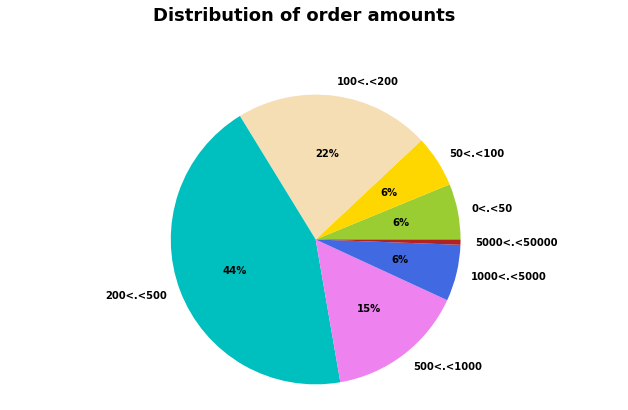

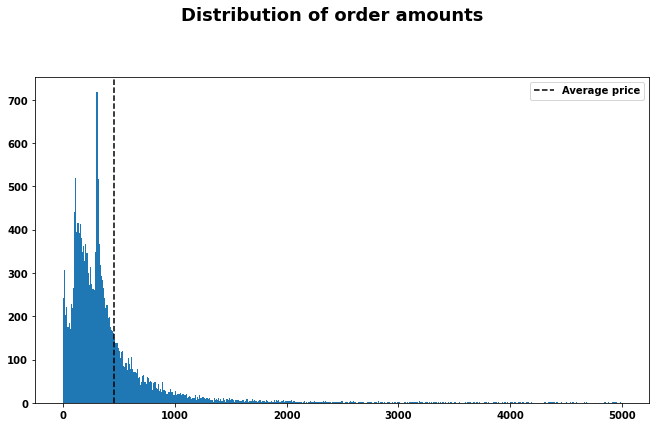

In [ ]:
import matplotlib.pyplot as plt

# Define price ranges
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

# Distribution of order amounts    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

# Distribution of order amounts    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
ax.hist(basket_price['Basket Price'][basket_price['Basket Price']<5000].values, bins=500)
ax.axvline(x=basket_price['Basket Price'].mean(), color='k', linestyle='--', label='Average price')
ax.legend()
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

## 2.7) Save data
Save preprocessed data to the file `data_cleaned.csv` and `basket_price.csv`

In [ ]:
df_cleaned.to_csv(relative_path + 'data_cleaned.csv')
basket_price.to_csv(relative_path + 'basket_price.csv')